In [1]:
import numpy as np
import pandas as pd

In [2]:
ColNames = ['UserID', 'ItemID', 'Rating', 'TimeStamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names= ColNames)

In [4]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [16]:
ColNames2 = ['ItemID', 'Title']

In [17]:
MovieTitles = pd.read_csv('Movie_Id_Titles', names=ColNames2)

In [18]:
MovieTitles.head()

,ItemID,Title
0,item_id,title
1,1,Toy Story (1995)
2,2,GoldenEye (1995)
3,3,Four Rooms (1995)
4,4,Get Shorty (1995)


In [19]:
MovieTitles = MovieTitles.drop(labels=0, axis=0)

In [20]:
MovieTitles.head()

,ItemID,Title
1,1,Toy Story (1995)
2,2,GoldenEye (1995)
3,3,Four Rooms (1995)
4,4,Get Shorty (1995)
5,5,Copycat (1995)


In [27]:
MovieTitles['ItemID'] = pd.to_numeric(MovieTitles['ItemID'])

In [28]:
MovieTitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ItemID  1682 non-null   int64 
 1   Title   1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.4+ KB


In [29]:
df = pd.merge(df,MovieTitles, on ='ItemID')

In [30]:
df.head()

,UserID,ItemID,Rating,TimeStamp,Title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('white')
%matplotlib inline

In [36]:
df.groupby('Title')['Rating'].mean().sort_values(ascending = False).head()

Title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [37]:
df.groupby('Title')['Rating'].count().sort_values(ascending = False).head()

Title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [38]:
Ratings = pd.DataFrame(df.groupby('Title')['Rating'].mean())

In [39]:
Ratings.head()

,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [40]:
Ratings['# of Ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())

In [41]:
Ratings.head()

,Rating,# of Ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

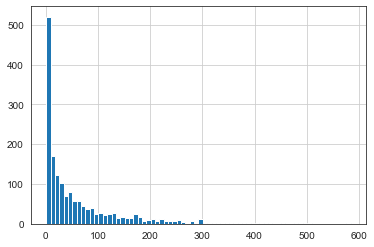

In [42]:
Ratings['# of Ratings'].hist(bins=70)

<AxesSubplot:>

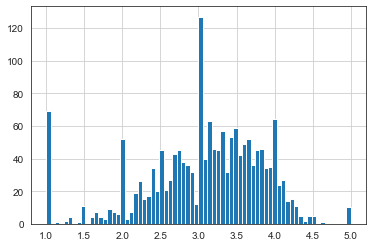

In [44]:
Ratings['Rating'].hist(bins=70)

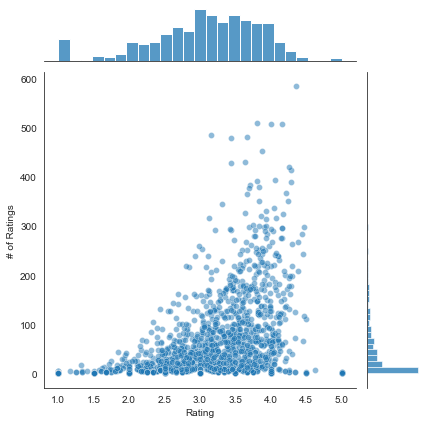

In [46]:
sns.jointplot(x='Rating',y='# of Ratings', data = Ratings, alpha = 0.5 )

In [47]:
df.head()

,UserID,ItemID,Rating,TimeStamp,Title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [48]:
moviemat = df.pivot_table(index='UserID', columns='Title',values = 'Rating')

In [49]:
moviemat.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
UserID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Ratings.sort_values('# of Ratings', ascending= False).head(10)

,Rating,# of Ratings
Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [51]:
StarWarsRatings = moviemat['Star Wars (1977)']
LiarLairRatings = moviemat['Liar Liar (1997)']

In [52]:
StarWarsRatings.head()

UserID
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [53]:
SimilarToStarWars = moviemat.corrwith(StarWarsRatings)

C:\Users\mogom\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mogom\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
SimilarToLiarLair = moviemat.corrwith(LiarLairRatings)

C:\Users\mogom\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mogom\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
CorrStarWars  = pd.DataFrame(SimilarToStarWars, columns=['Correlations'])
CorrStarWars.dropna(inplace = True )

In [57]:
CorrStarWars.head()

,Correlations
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [59]:
CorrStarWars.sort_values('Correlations', ascending = False).head(10)

,Correlations
Title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [60]:
CorrStarWars = CorrStarWars.join(Ratings['# of Ratings'])

In [61]:
CorrStarWars.head()

,Correlations,# of Ratings
Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [62]:
CorrStarWars[CorrStarWars['# of Ratings']> 100].sort_values('Correlations', ascending = False).head()

,Correlations,# of Ratings
Title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [63]:
CorrLiarLair  = pd.DataFrame(SimilarToLiarLair, columns=['Correlations'])
CorrLiarLair.dropna(inplace = True )

In [64]:
CorrLiarLair.head()

,Correlations
Title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [65]:
CorrLiarLair.sort_values('Correlations', ascending = False).head(10)

,Correlations
Title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [68]:
CorrLiarLair = CorrLiarLair.join(Ratings['# of Ratings'])

In [69]:
CorrLiarLair.head()

,Correlations,# of Ratings
Title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [71]:
CorrLiarLair[CorrLiarLair['# of Ratings']>100].sort_values('Correlations', ascending = False).head(10)

,Correlations,# of Ratings
Title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
